In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.shape

(1338, 7)

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df = df.drop_duplicates(keep= 'first')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<Axes: xlabel='charges', ylabel='bmi'>

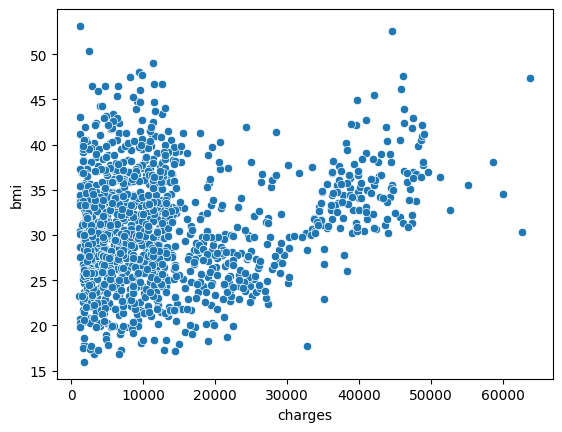

In [11]:
sns.scatterplot(y = df['bmi'] , x = df['charges'])

C:\Users\ataha\AppData\Local\Temp\ipykernel_28120\1319113370.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<Axes: xlabel='charges', ylabel='Density'>

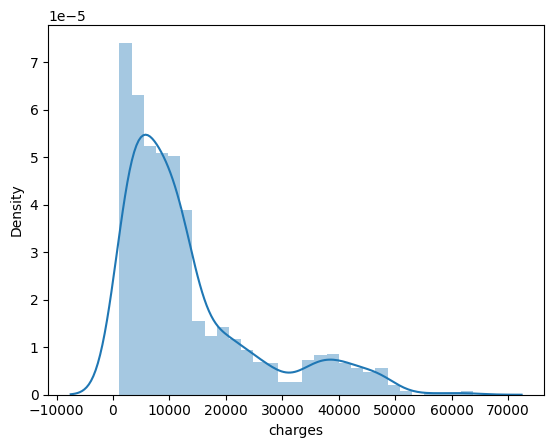

In [12]:
sns.distplot(df['charges'])

C:\Users\ataha\AppData\Local\Temp\ipykernel_28120\4168411822.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<Axes: xlabel='bmi', ylabel='Density'>

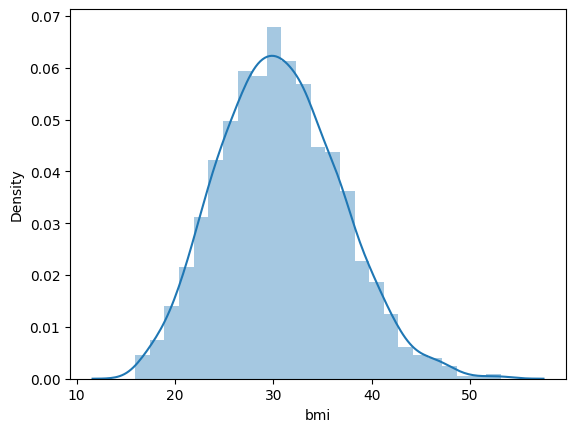

In [13]:
sns.distplot(df['bmi'])

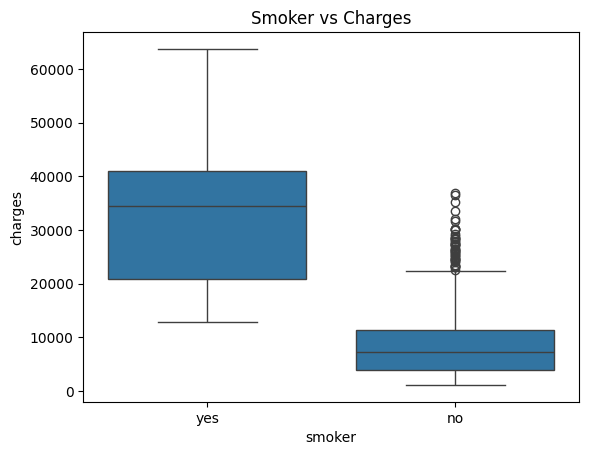

In [14]:
plt.figure()
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Smoker vs Charges")
plt.show()


In [15]:
df['smoker_binary'] = df['smoker'].map({'yes': 1, 'no': 0})


C:\Users\ataha\AppData\Local\Temp\ipykernel_28120\1063335362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoker_binary'] = df['smoker'].map({'yes': 1, 'no': 0})


In [16]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)


C:\Users\ataha\AppData\Local\Temp\ipykernel_28120\4188577401.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi_category'] = df['bmi'].apply(bmi_category)


In [17]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_binary,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,1,overweight
1,18,male,33.770,1,no,southeast,1725.55230,0,obese
2,28,male,33.000,3,no,southeast,4449.46200,0,obese
3,33,male,22.705,0,no,northwest,21984.47061,0,normal
4,32,male,28.880,0,no,northwest,3866.85520,0,overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,obese
1334,18,female,31.920,0,no,northeast,2205.98080,0,obese
1335,18,female,36.850,0,no,southeast,1629.83350,0,obese
1336,21,female,25.800,0,no,southwest,2007.94500,0,overweight


In [18]:
X = df.drop(columns=['charges', 'smoker'])  # smoker is replaced by smoker_binary
y = df['charges']


In [19]:
X = pd.get_dummies(X, drop_first=True)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
# Dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []

for model_name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    results.append({
        "Model": model_name,
        "R2 Score": r2,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Sort by R2 Score (best first)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

results_df


,Model,R2 Score,MAE,MSE,RMSE
4,Gradient Boosting,0.901710,2491.478100,1.806143e+07,4249.874521
3,Random Forest,0.880449,2651.142722,2.196831e+07,4687.036707
0,Linear Regression,0.802527,4334.481445,3.628684e+07,6023.856240
2,Lasso Regression,0.802527,4334.476512,3.628689e+07,6023.859999
1,Ridge Regression,0.802365,4335.464346,3.631664e+07,6026.329124
